---
Ejercicio 1: Spotify – ¿Cuál es tu mood musical de la semana?

---

📌 Enunciado:

Simula una semana de canciones escuchadas con género, duración y emoción (feliz, triste, etc.).
Tu objetivo es:

Detectar el género más escuchado

Identificar la emoción predominante

Visualizar la duración media diaria

utiliza un gráfico de barras para ver el promedio de minutos escuchados por día.



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
from textblob import TextBlob

In [4]:
dias_semana = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
generos = ["Pop", "Rock", "Electrónica", "Reggaetón", "Indie"]
emociones = ["Feliz", "Triste", "Energética", "Relajada"]


In [ ]:
canciones = []

for _ in range(100):
    cancion = {
        "Nombre": f"Track_{random.randint(1, 200)}",
        "Género": random.choice(generos),
        "Duración": round(random.uniform(2.0, 5.5), 2),
        "Día": random.choice(dias_semana),
        "Emoción": random.choice(emociones)
    }
    canciones.append(cancion)



In [23]:
df_spotify = pd.DataFrame(canciones)
df_spotify.head(5)

,Nombre,Género,Duración,Día,Emoción
0,Track_10,Pop,2.77,Viernes,Energética
1,Track_56,Reggaetón,5.24,Miércoles,Relajada
2,Track_103,Rock,3.70,Miércoles,Triste
3,Track_27,Pop,3.74,Lunes,Triste
4,Track_49,Reggaetón,4.31,Martes,Relajada


Detectar el género más escuchado:

In [12]:

genero_mas_escuchado = df_spotify["Género"].value_counts().idxmax()
genero_mas_escuchado


'Reggaetón'

Identificar la emoción predominante:


In [13]:
emocion_predominante = df_spotify["Emoción"].value_counts().idxmax()
emocion_predominante


'Relajada'

Visualizar la duración media diaria:


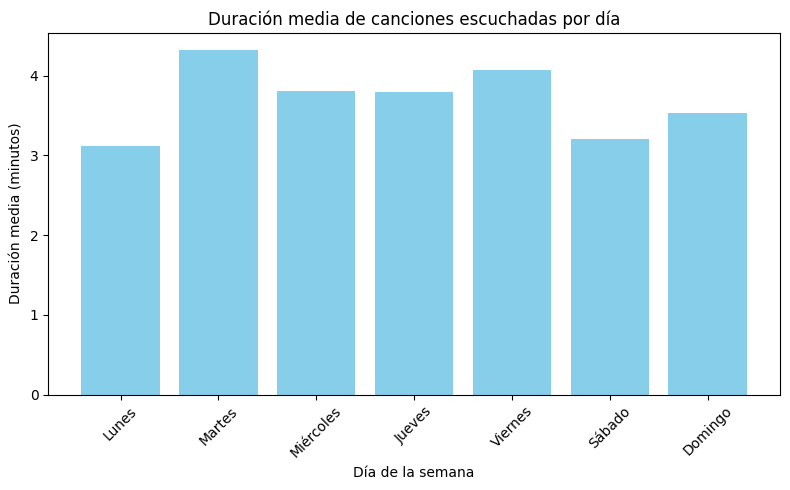

In [19]:
duracion_media_por_dia = df_spotify.groupby("Día")["Duración"].mean().reindex(dias_semana)

plt.figure(figsize=(8, 5))
plt.bar(duracion_media_por_dia.index, duracion_media_por_dia.values, color='skyblue')
plt.title("Duración media de canciones escuchadas por día")
plt.xlabel("Día de la semana")
plt.ylabel("Duración media (minutos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


---
Ejercicio 2: YouTube – Análisis de duración por categoría

---

📌 Enunciado:

Simula una lista de videos con categoría (Música, Educación, etc.) y duración.

Compara la duración por categoría mediante un gráfico de caja (boxplot).



In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Paso 1: Simular los datos
categorias = ["Música", "Educación", "Entretenimiento", "Noticias"]
videos = []

for i in range(50):  # simulamos 50 videos
    video = {
        "Título": f"Video_{i+1}",
        "Categoría": random.choice(categorias),
        "Duración": round(random.uniform(2.0, 30.0), 1)  # duración entre 2 y 30 minutos
    }
    videos.append(video)



In [22]:
# Creamos el DataFrame
df_videos = pd.DataFrame(videos)
df_videos.head(5)


,Título,Categoría,Duración
0,Video_1,Noticias,9.3
1,Video_2,Noticias,12.8
2,Video_3,Música,5.8
3,Video_4,Educación,22.4
4,Video_5,Música,19.5


Generar el gráfico de caja

<Figure size 800x500 with 0 Axes>

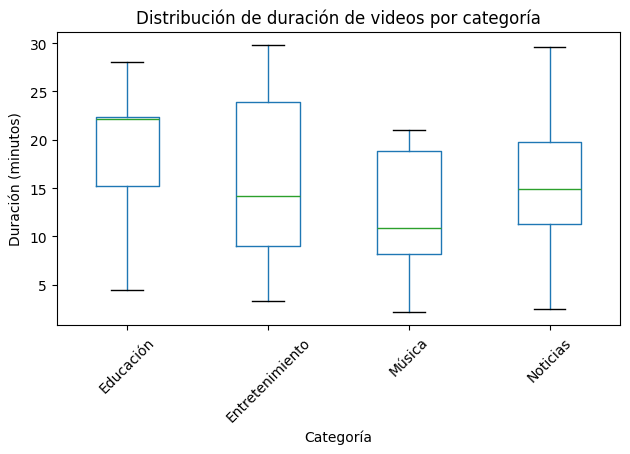

In [24]:
plt.figure(figsize=(8, 5))
df_videos.boxplot(column="Duración", by="Categoría", grid=False)
plt.title("Distribución de duración de videos por categoría")
plt.suptitle("")  # Quitar el título automático de pandas
plt.xlabel("Categoría")
plt.ylabel("Duración (minutos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---
Ejercicio 3: Análisis de Sentimientos en Tweets

---
📌 Enunciado:

Has recibido un conjunto de 30 tweets que mencionan distintos temas actuales como economía, salud, python, clima o comida.
Tu objetivo es construir un pequeño analizador de sentimiento que:

Clasifique cada tweet como positivo, negativo o neutro según su polaridad.

Muestre un DataFrame con cada tweet, su puntaje de polaridad y su etiqueta de sentimiento.

Visualice un gráfico circular que indique la proporción de tweets por tipo de sentimiento.

Herramientas necesarias: pandas, TextBlob, matplotlib

In [51]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Paso 1: Cargar el archivo CSV con los tweets
df_tweets = pd.read_csv("tweets_simulados.csv")
df_tweets.head(5)

,tweet
0,Es absolutamente maravilloso aprender sobre de...
1,Un artículo hablaba de comida.
2,¡Me encanta todo lo relacionado con deporte.
3,Qué situación tan desastrosa en el área de not...
4,Es completamente terrible lo relacionado con n...


 Analizar la polaridad y clasificar el sentimiento

In [52]:

def clasificar_sentimiento(texto):
    polaridad = TextBlob(texto).sentiment.polarity
    if polaridad > 0.1:
        return "Positivo"
    elif polaridad < -0.1:
        return "Negativo"
    else:
        return "Neutro"

In [53]:
df_tweets["Polaridad"] = df_tweets["tweet"].apply(lambda t: TextBlob(t).sentiment.polarity)
df_tweets.head(5)

,tweet,Polaridad
0,Es absolutamente maravilloso aprender sobre de...,0.0
1,Un artículo hablaba de comida.,0.0
2,¡Me encanta todo lo relacionado con deporte.,0.0
3,Qué situación tan desastrosa en el área de not...,0.0
4,Es completamente terrible lo relacionado con n...,-1.0


In [54]:
df_tweets["Sentimiento"] = df_tweets["tweet"].apply(clasificar_sentimiento)
df_tweets.head(5)

,tweet,Polaridad,Sentimiento
0,Es absolutamente maravilloso aprender sobre de...,0.0,Neutro
1,Un artículo hablaba de comida.,0.0,Neutro
2,¡Me encanta todo lo relacionado con deporte.,0.0,Neutro
3,Qué situación tan desastrosa en el área de not...,0.0,Neutro
4,Es completamente terrible lo relacionado con n...,-1.0,Negativo


Gráfico circular de proporción de sentimientos

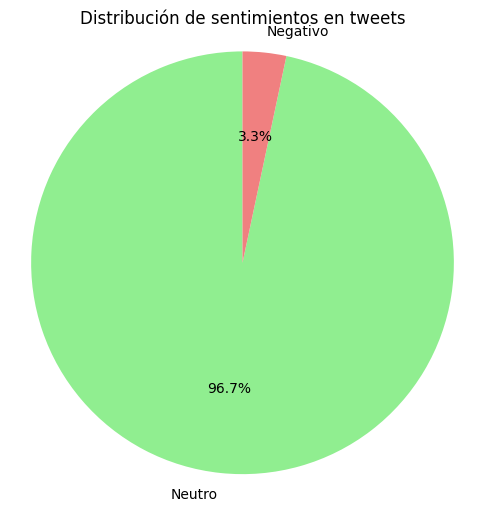

In [55]:
conteo = df_tweets["Sentimiento"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(conteo.values, labels=conteo.index, autopct='%1.1f%%', startangle=90, colors=["lightgreen", "lightcoral", "lightgray"])
plt.title("Distribución de sentimientos en tweets")
plt.axis("equal")
plt.show()


---
Ejercicio 4 : Simulación de Chatbot básico

---
📌 Enunciado:

Crea un chatbot simple que pueda:

Detectar palabras clave como "hola", "curso", "horario", "adiós"

Responder de forma natural con frases aleatorias según la intención del usuario

Registrar cada interacción (entrada + respuesta + hora) en un DataFrame

Manejar frases no reconocidas con una respuesta por defecto



In [56]:
import random
from datetime import datetime
import pandas as pd

# Base de respuestas por intención
respuestas = {
    "saludo": [
        "¡Hola! ¿En qué puedo ayudarte hoy?",
        "¡Bienvenido! ¿Cómo puedo asistirte?",
        "¡Hola! Estoy aquí para ayudarte."
    ],
    "curso": [
        "Ofrecemos cursos de Python, Análisis de Datos y Machine Learning.",
        "Tenemos disponibles: Python Básico, Data Science, y Visualización con Power BI."
    ],
    "horario": [
        "Nuestro horario es de lunes a viernes, de 9:00 a 18:00.",
        "Puedes contactarnos en horario laboral: 9 a 18 horas, días hábiles."
    ],
    "despedida": [
        "¡Hasta pronto! Que tengas un gran día.",
        "Gracias por visitarnos. ¡Nos vemos pronto!",
        "¡Cuídate! Estamos aquí si necesitas más ayuda."
    ],
    "desconocido": [
        "Lo siento, no entendí tu mensaje. ¿Puedes repetirlo?",
        "Hmm, no tengo una respuesta clara para eso. ¿Quizás intentas reformularlo?",
        "No estoy seguro de qué quieres decir. ¿Puedes explicarte un poco más?"
    ]
}

In [57]:
# Inicializar historial de conversación
historial = []

# Bucle del chatbot
print("Chatbot activo. Escribe 'salir' para terminar.\n")

while True:
    entrada = input("Tú: ").strip()
    if entrada.lower() == "salir":
        print("Chatbot: ¡Hasta luego!")
        break

    entrada_lower = entrada.lower()
    
    # Clasificación de intención
    if "hola" in entrada_lower:
        respuesta = random.choice(respuestas["saludo"])
    elif "curso" in entrada_lower:
        respuesta = random.choice(respuestas["curso"])
    elif "horario" in entrada_lower or "hora" in entrada_lower:
        respuesta = random.choice(respuestas["horario"])
    elif "gracias" in entrada_lower or "gracia" in entrada_lower:
        respuesta = "¡Con gusto!"
    elif "adiós" in entrada_lower or "nos vemos" in entrada_lower:
        respuesta = random.choice(respuestas["despedida"])
    else:
        respuesta = random.choice(respuestas["desconocido"])
    
    print("Chatbot:", respuesta)

    # Guardar en historial
    historial.append({
        "Usuario": entrada,
        "Chatbot": respuesta,
        "Hora": datetime.now().strftime("%H:%M:%S")
    })




Chatbot activo. Escribe 'salir' para terminar.

Chatbot: No estoy seguro de qué quieres decir. ¿Puedes explicarte un poco más?
Chatbot: ¡Bienvenido! ¿Cómo puedo asistirte?
Chatbot: Tenemos disponibles: Python Básico, Data Science, y Visualización con Power BI.
Chatbot: ¡Hasta luego!


In [58]:
# Convertir historial a DataFrame (opcional)
df_historial = pd.DataFrame(historial)
df_historial.head(5)


,Usuario,Chatbot,Hora
0,como estas?,No estoy seguro de qué quieres decir. ¿Puedes ...,00:39:02
1,hola,¡Bienvenido! ¿Cómo puedo asistirte?,00:39:10
2,podrias explicarme los cursos que tienes,"Tenemos disponibles: Python Básico, Data Scien...",00:39:37


In [ ]:
df_historial.to_csv("historial_chatbot.csv", index=False)
print("\n📝 Conversación guardada en 'historial_chatbot.csv'")

---
Clasificador manual de imágenes

---

Construir un programa en Python usando OpenCV que permita al usuario clasificar imágenes de forma manual, una por una, y guardar el resultado en un archivo .csv.

📋 Instrucciones:
Crea una carpeta llamada dataset/ en el mismo directorio donde esté el script.

Copia dentro de esa carpeta algunas imágenes (.jpg, .png, .jpeg).

El programa debe:

Mostrar una imagen a la vez en pantalla.

Esperar que el usuario presione:

'a' para clasificarla como clase A.

'b' para clasificarla como clase B.

ESC para salir del programa anticipadamente.

Guardar el nombre de la imagen y su clase en un archivo llamado resultados.csv.

Al finalizar, se debe cerrar la ventana de visualización y guardar todas las clasificaciones hechas hasta ese momento.



In [ ]:
import cv2
import os
import csv

# Carpeta con las imágenes
RUTA = 'dataset/'
SALIDA = 'dataset/resultados.csv'

# Formatos permitidos
formatos = ('.jpg', '.png', '.jpeg')

# Lista de imágenes
imagenes = [img for img in os.listdir(RUTA) if img.lower().endswith(formatos)]

# Abrimos el archivo para guardar los resultados
with open(SALIDA, 'w', newline='', encoding='utf-8') as archivo:
    writer = csv.writer(archivo)
    writer.writerow(['imagen', 'clase'])  # Cabecera del CSV

    for nombre in imagenes:
        ruta = os.path.join(RUTA, nombre)
        imagen = cv2.imread(ruta)

        if imagen is None:
            print(f"No se pudo abrir {nombre}")
            continue

        cv2.imshow("Clasifica con 'a' o 'b' - ESC para salir", imagen)

        # Esperar a que el usuario presione una tecla válida
        while True:
            tecla = cv2.waitKey(0) & 0xFF

            if tecla == ord('a'):
                writer.writerow([nombre, 'A'])
                break
            elif tecla == ord('b'):
                writer.writerow([nombre, 'B'])
                break
            elif tecla == 27:  # ESC
                print("Saliendo del clasificador.")
                cv2.destroyAllWindows()
                exit()

cv2.destroyAllWindows()
print("✅ Clasificación finalizada y guardada.")


---
Ejercicio 6: Mapa interactivo de ubicaciones con Folium

---
Usar un dataset con coordenadas geográficas para crear un mapa interactivo que muestre puntos sobre un mapa, con información adicional al hacer clic en cada punto.

📋 Enunciado:
Usando la librería folium, crea un mapa interactivo que muestre las ubicaciones contenidas en un dataset con coordenadas geográficas.

El programa debe:

Cargar un archivo CSV llamado lugares.csv con las columnas:

nombre

latitud

longitud

descripcion (opcional)

Generar un mapa centrado en la media de todas las coordenadas.

Agregar un marcador por cada lugar, con:

Popup: el nombre y la descripción.

Icono personalizado (opcional).

Guardar el resultado como mapa_lugares.html.



In [ ]:
import folium
import pandas as pd

# Cargar el archivo CSV
archivo = 'lugares.csv'  # Asegúrate de tener este archivo en la misma carpeta
df = pd.read_csv(archivo)

# Calcular el centro del mapa (media de latitudes y longitudes)
lat_centro = df['latitud'].mean()
lon_centro = df['longitud'].mean()

# Crear el mapa centrado
mapa = folium.Map(location=[lat_centro, lon_centro], zoom_start=13)

# Agregar marcadores al mapa
for _, fila in df.iterrows():
    folium.Marker(
        location=[fila['latitud'], fila['longitud']],
        popup=f"<b>{fila['nombre']}</b><br>{fila.get('descripcion', '')}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

# Guardar el mapa en un archivo HTML
mapa.save("mapa_lugares.html")
print("✅ Mapa generado: mapa_lugares.html")


---
Ejercicio 7: Mapa con tu ubicación actual detectada por IP

---

Detectar tu ubicación pública (aproximada) usando tu IP, y colocarla en un mapa interactivo con un marcador personalizado. Finalmente, guardar ese mapa como archivo HTML.

📋 Enunciado para clase o notebook:
Usando las librerías geocoder y folium, crea un script que:

Detecte tu ubicación actual usando tu dirección IP pública.

Cree un mapa centrado en esa posición.

Agregue un marcador en tu ubicación con:

Tu ciudad y país

La fecha y hora actual

Guarde el mapa en un archivo llamado mi_ubicacion.html que puedas abrir en tu navegador.

In [ ]:
import geocoder
import folium
from datetime import datetime

# Obtener ubicación actual por IP
ubicacion = geocoder.ip('me')

if ubicacion.ok:
    lat, lon = ubicacion.latlng
    ciudad = ubicacion.city
    pais = ubicacion.country
    print(f" Ubicación detectada: {ciudad}, {pais} ({lat}, {lon})")

    # Crear mapa centrado en la ubicación
    mapa = folium.Map(location=[lat, lon], zoom_start=13)

    # Texto para el marcador
    ahora = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    texto = f"<b>{ciudad}, {pais}</b><br>Detectado el {ahora}"

    # Agregar marcador
    folium.Marker(
        [lat, lon],
        popup=texto,
        tooltip="Tu ubicación",
        icon=folium.Icon(color='green', icon='home')
    ).add_to(mapa)

    # Guardar el mapa
    mapa.save("mi_ubicacion.html")
    print("✅ Mapa guardado como 'mi_ubicacion.html'")

else:
    print(" No se pudo obtener la ubicación.")


📍 Ubicación detectada: Madrid, ES (40.4165, -3.7026)
✅ Mapa guardado como 'mi_ubicacion.html'


---
Ejercicio 8: Crear un relieve 3D a partir de una imagen en escala de grises

---

Cargar una imagen y convertirla en una superficie 3D donde la intensidad de gris se convierte en altura, generando así una especie de “relieve” o mapa de elevación.

📋 Enunciado para clase o notebook:
Usando OpenCV y matplotlib, crea una aplicación que:

Lea una imagen en escala de grises.

Interprete los valores de píxeles como alturas.

Genere una malla 3D (superficie) donde:

Eje X = columnas

Eje Y = filas

Eje Z = intensidad de gris (altura)

Visualiza el resultado como un gráfico 3D de tipo “relieve”.

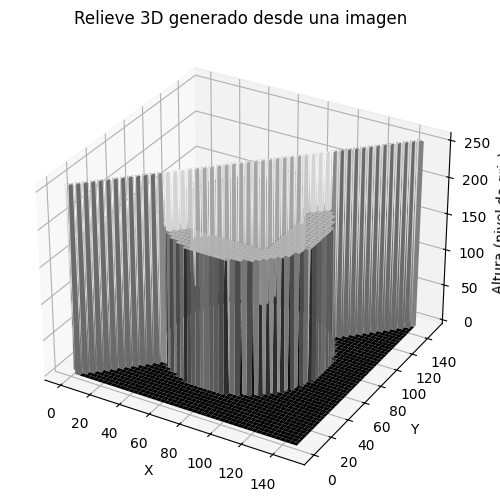

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Leer imagen en escala de grises
imagen = cv2.imread("relieve_ejemplo.png", cv2.IMREAD_GRAYSCALE)

# Redimensionar para hacerlo más manejable
imagen = cv2.resize(imagen, (150, 150))

# Crear malla X, Y
x = np.arange(0, imagen.shape[1])
y = np.arange(0, imagen.shape[0])
X, Y = np.meshgrid(x, y)

# Los valores de Z serán la intensidad de gris (ya es un array 2D)
Z = imagen

# Crear gráfico 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Dibujar la superficie
ax.plot_surface(X, Y, Z, cmap='gray', edgecolor='none')

# Opciones de vista
ax.set_title("Relieve 3D generado desde una imagen")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Altura (nivel de gris)")

plt.show()


---
Desafio!! Cámara en tiempo real con OpenCV: modos de visualización

---

Crea una aplicación que capture video desde la webcam en tiempo real. El programa debe permitir cambiar el modo de visualización presionando diferentes teclas:

"g": convierte la imagen a escala de grises.

"e": aplica un filtro de detección de bordes (Canny).

"c": muestra la imagen original a color.

"q" o ESC: cierra la aplicación.

Además, se debe mostrar en la ventana el modo actual en pantalla.

In [ ]:
import cv2

# Inicializar la cámara
cap = cv2.VideoCapture(0)
modo = 'Color'

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Aplicar el modo seleccionado
    if modo == 'Grises':
        display = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    elif modo == 'Bordes':
        gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        display = cv2.Canny(gris, 50, 150)
    else:
        display = frame

    # Mostrar el modo en pantalla
    if modo != 'Color':
        # Si es Bordes (una imagen 1 canal), convertimos a BGR para mostrar texto en color
        if len(display.shape) == 2:
            display = cv2.cvtColor(display, cv2.COLOR_GRAY2BGR)
        cv2.putText(display, f'Modo: {modo}', (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Mostrar la imagen procesada
    cv2.imshow("Webcam", display)

    # Leer tecla presionada
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q') or key == 27: 
        break
    elif key == ord('g'):
        modo = 'Grises'
    elif key == ord('e'):
        modo = 'Bordes'
    elif key == ord('c'):
        modo = 'Color'

# Liberar recursos
cap.release()
cv2.destroyAllWindows()


---
Minijuego con Pygame: esquivar obstáculos

---

Crea un minijuego usando pygame en el que un cuadrado rojo representa al jugador. El jugador puede moverse a izquierda y derecha con las teclas del teclado.

Desde la parte superior de la pantalla caen obstáculos negros de forma aleatoria. Si el jugador colisiona con alguno, se muestra un mensaje de "Game Over" y termina el juego.

El juego debe tener:

Una ventana de 600x400 píxeles.

Movimiento con flechas izquierda/derecha.

Obstáculos que caen desde arriba.

Detección de colisiones.

Finalización automática o al cerrar la ventana.

In [ ]:
import pygame
import random

# Inicializar pygame
pygame.init()

# Configuración de pantalla
ANCHO, ALTO = 600, 400
pantalla = pygame.display.set_mode((ANCHO, ALTO))
pygame.display.set_caption("Esquiva los obstáculos")

# Colores
BLANCO = (255, 255, 255)
ROJO = (255, 0, 0)
NEGRO = (0, 0, 0)

# Jugador
jugador = pygame.Rect(300, 350, 50, 50)
velocidad_jugador = 5

# Obstáculos
obstaculos = []
ancho_obstaculo = 50
alto_obstaculo = 50
velocidad_obstaculo = 5
reloj = pygame.time.Clock()

# Fuente
fuente = pygame.font.SysFont(None, 48)

# Función para mostrar texto
def mostrar_texto(texto):
    render = fuente.render(texto, True, (200, 0, 0))
    rect = render.get_rect(center=(ANCHO // 2, ALTO // 2))
    pantalla.blit(render, rect)
    pygame.display.flip()
    pygame.time.wait(2000)

# Bucle principal
ejecutando = True
while ejecutando:
    pantalla.fill(BLANCO)

    for evento in pygame.event.get():
        if evento.type == pygame.QUIT:
            ejecutando = False

    # Movimiento del jugador
    teclas = pygame.key.get_pressed()
    if teclas[pygame.K_LEFT] and jugador.left > 0:
        jugador.x -= velocidad_jugador
    if teclas[pygame.K_RIGHT] and jugador.right < ANCHO:
        jugador.x += velocidad_jugador

    # Generar obstáculos aleatorios
    if random.randint(1, 20) == 1:
        x = random.randint(0, ANCHO - ancho_obstaculo)
        obstaculos.append(pygame.Rect(x, 0, ancho_obstaculo, alto_obstaculo))

    # Mover y dibujar obstáculos
    for obs in obstaculos:
        obs.y += velocidad_obstaculo
        pygame.draw.rect(pantalla, NEGRO, obs)

    # Detección de colisión
    for obs in obstaculos:
        if jugador.colliderect(obs):
            mostrar_texto("Game Over")
            ejecutando = False

    # Dibujar jugador
    pygame.draw.rect(pantalla, ROJO, jugador)

    pygame.display.flip()
    reloj.tick(30)

# Cierre limpio
pygame.quit()
